#### Лабораторная работа №3. Ковалёва Елена Сергеевна. 20152. Вариант 1.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

константы:

In [2]:
E = 30
A = 0.0341
r = 2150
P = 30000
g = 9.81
L = 5
C = E * A
f = r * g * A

точное решение и его график:

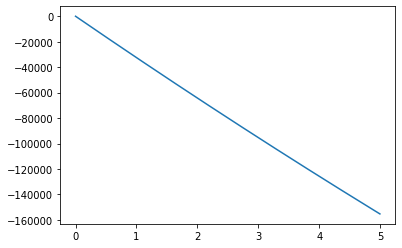

In [3]:
def uex(x):
    k1 = 2150 * 9.81 / 60
    k2 = (30000 + (2150 * 9.81 * 0.0341 * 5)) / (30 * 0.0341)
    return ((k1 * (x ** 2)) - (k2 * x))

Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')

функции формы

In [4]:
def fi(x, i, N):
    delta = L / N
    if (i == 0):
        if ((0 <= x) & (x <= delta)):
            a = 1 - (x / delta)
            return a
        else:
            return 0
    elif (i == N):
        if ((((N - 1) * delta) <= x) & (x <= L)):
            a = (x / delta) - N + 1
            return a
        else:
            return 0
    else:
        if (((i - 1) * delta <= x) & (x <= i * delta)):
            a = (x / delta) - i + 1
            return a
        elif ((i * delta <= x) & (x <= (i + 1) * delta)):
            a = i + 1 - (x / delta)
            return a
        else:
            return 0

локальная матрица для левой части

In [5]:
def Ke(N, i):
    c = np.zeros((N + 1, N + 1))
    c[i][i] = 1
    c[i][i+1] = -1
    c[i+1][i] = -1
    c[i+1][i+1] = 1
    return c

матрица жесткости

In [7]:
def K(N):
    #коэффициент
    ck = E * A * N / L
    #матрица
    c = np.zeros((N + 1, N + 1))
    #складываем локальные матрицы
    for i in range(N):
        g = Ke(N, i)
        c = c + g
    #зануляем первую строку, ставим 1
    for i in range(N + 1):
        c[0][i] = 0
    c[0][0] = 1
    #домножаем на коэффициент
    c = ck * c
    return c

локальная матрица для правой части

In [9]:
def Pe(N, i):
    c = np.zeros((N + 1, N + 1))
    c[i][i] = 2
    c[i][i+1] = 1
    c[i+1][i] = 1
    c[i+1][i+1] = 2
    return c

вектор нагрузок

In [10]:
def P(N):
    #коэффициент
    cp = - L / (6 * N)
    #матрица
    c1 = np.zeros((N + 1, N + 1))
    #складываем локальные матрицы
    for i in range(N):
        g = Pe(N, i)
        c1 = c1 + g
    #зануляем первую строку
    for i in range(N + 1):
        c1[0][i] = 0
    #домножаем на коэффициент
    c1 = cp * c1
    #домножаем на вектор
    c2 = np.full(N + 1, f)
    c3 = np.transpose(c2)
    c = c1.dot(c3)
    #-С1*С(L)*fis(L)
    c[N] = c[N] - 30000
    return c

решение слау и приближенное решение задачи

In [11]:
def mke(N):
    u = np.zeros(N + 1)
    Q, R = np.linalg.qr(K(N))
    u = np.linalg.solve(R, np.dot(Q.transpose(), P(N)))
    return u

def uh(x, N):
    u = mke(N)
    s = 0
    for i in range(N + 1):
        k = fi(x, i, N)
        a = k * u[i]
        s = s + a
    return s

относительные погрешности и число обусловленности

In [12]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from numpy import sqrt

def e_inf(N):
    Q = 1000
    X = [i * 0.001 * L for i in range(Q)]
    a1 = max([np.abs(uex(x) - uh(x, N)) for x in X])
    a2 = max([np.abs(uex(x)) for x in X])
    a = a1 / a2
    return a

def u1(x, N):
    return ((uex(x) - uh(x, N)) ** 2)

def u2(x):
    return (uex(x) ** 2)

def e_l2(N):
    Q = 1000
    X = [i * 0.001 * L for i in range(Q)]
    a1 = sum(u1(x, N) * 0.001 * L for x in X)
    a2 = sum(u2(x) * 0.001 * L for x in X)
    a = sqrt (a1 / a2)
    return a

def mu(A):
    return np.linalg.cond(A)

графики и таблица

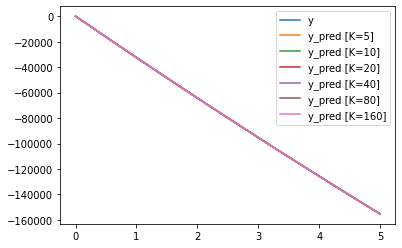

N	Er_inf	Порядок_сходимости	Er	Er_L2	mu(K)

5	0.0005659933346706164	2.643856189771084	0.0007057590080700855	46.332253832840706

10	0.00014149833366809927	1.999999999995461	0.00017643975119078833	175.57443654867808

20	3.537458341690767e-05	2.0000000000047775	4.410993448443659e-05	677.8775250641013

40	8.829496020171705e-06	2.00231016079969	1.102747033548959e-05	2655.5376074008623

80	2.2073742227230253e-06	1.9999998577286933	2.756867851939402e-06	10501.784647097784

160	5.518434974919537e-07	2.0000001521240947	6.892157688955935e-07	41757.31054906917



In [28]:
Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')
logs = [] # Таблица результатов
b1 = e_inf(2)
for N in [5, 10, 20, 40, 80, 160]:
    y = [uh(x, N) for x in X]

    a1 = e_inf(N)
    a2 = e_l2(N)
    plt.plot(X, y, label=f'y_pred [K={str(N)}]')
    logs.append(f"{N}\t"
                f"{a1}\t"
                f"{np.log2(b1/a1)}\t"
                f"{a2}\t"
                f"{mu(K(N))}\n")
    b1 = a1
plt.legend()
plt.show()
for line in ['N\tEr_inf\tПорядок_сходимости\tEr\tEr_L2\tmu(K)\n'] + logs: 
    print(line)

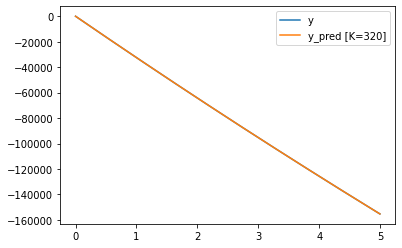

N	Er_inf	Порядок_сходимости	Er	Er_L2	mu(K)

320	1.3796137530102485e-07	1.9999947616664127	1.723040182458123e-07	166520.14680307932



In [34]:
Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')
logs = [] # Таблица результатов
b1 = e_inf(160)
N = 320
y = [uh(x, N) for x in X]
a1 = e_inf(N)
a2 = e_l2(N)
plt.plot(X, y, label=f'y_pred [K={str(N)}]')
logs.append(f"{N}\t"
            f"{a1}\t"
            f"{np.log2(b1/a1)}\t"
            f"{a2}\t"
            f"{mu(K(N))}\n")
plt.legend()
plt.show()
for line in ['N\tEr_inf\tПорядок_сходимости\tEr\tEr_L2\tmu(K)\n'] + logs: 
    print(line)